<a href="https://colab.research.google.com/github/M-Rathnayake/Titanic-ML-from-disaster/blob/main/train_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic - Machine Learning project

Importing data using pandas library

In [2]:
import pandas as pd
train_df= pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Identifying missing values (seaborn to visualize)

In [3]:
#identifying missing values
missing = train_df.isnull().sum()
print(missing[missing>0])

Age         177
Cabin       687
Embarked      2
dtype: int64


<Axes: >

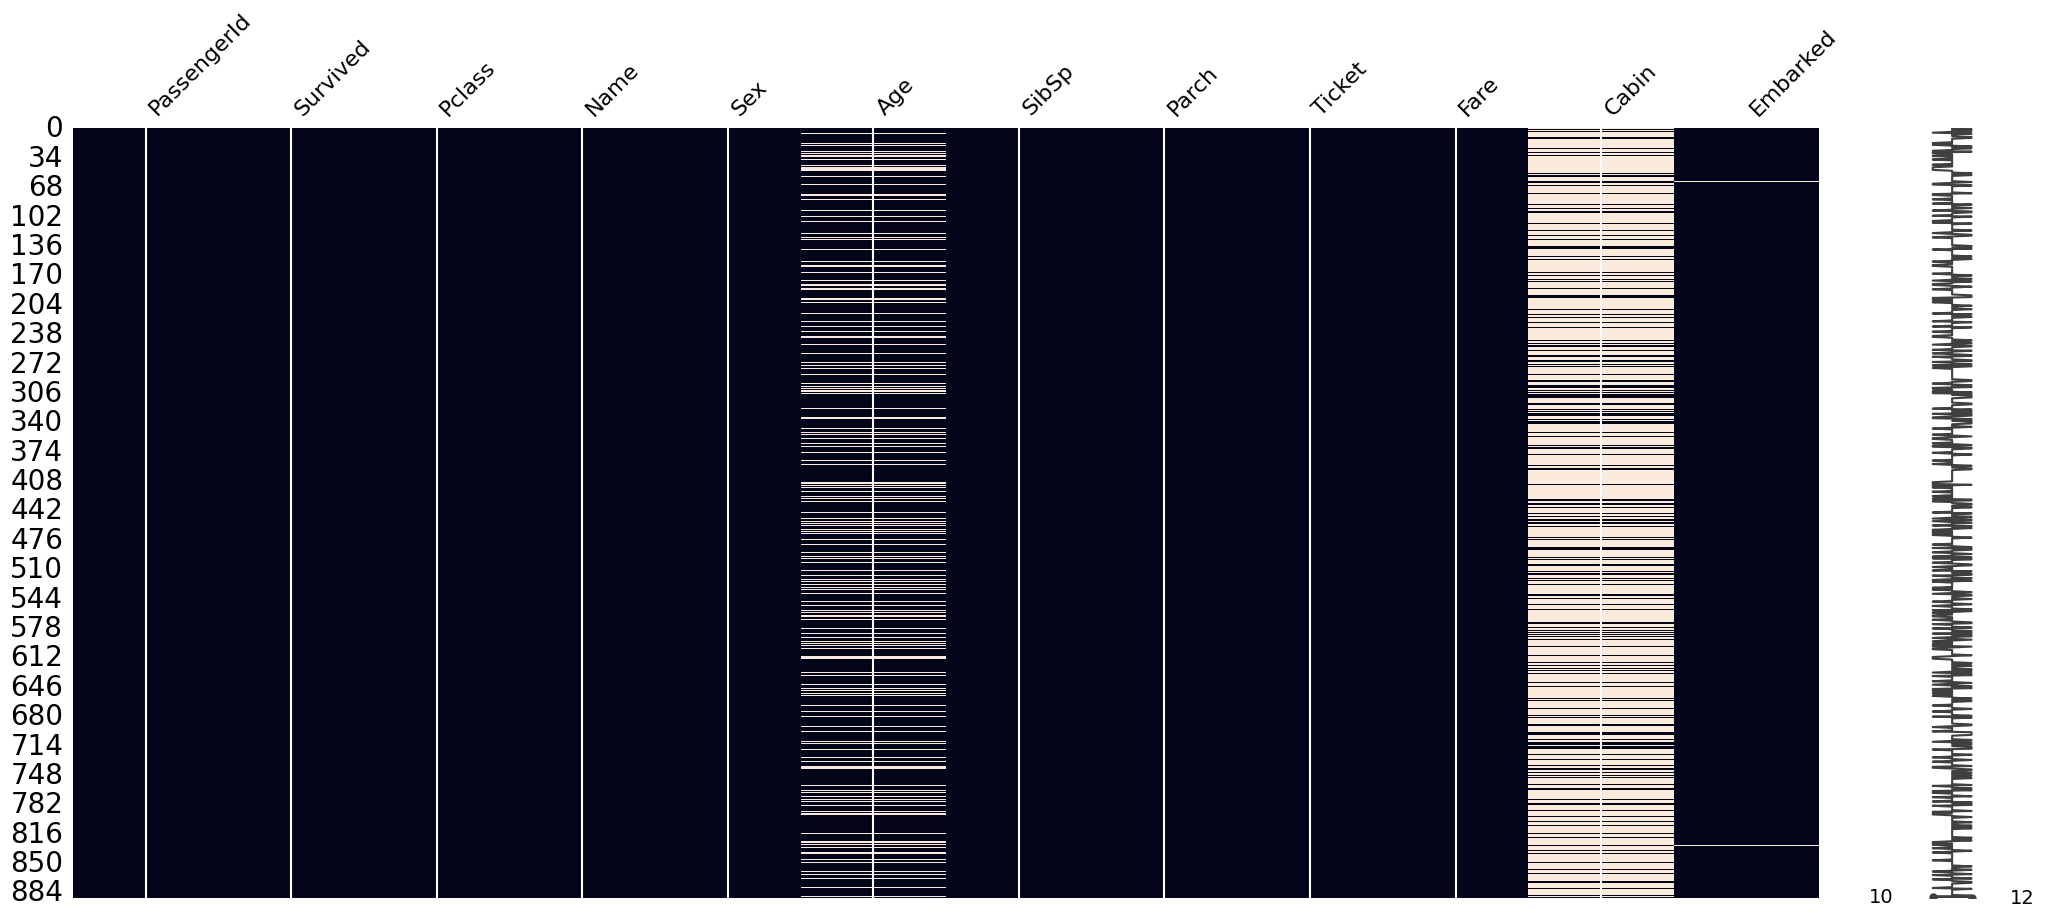

In [5]:
#analyzing the patterns of misssing values by using a chart
#this is done as sum of missing values is greater than 5
import missingno as msno
msno.matrix(train_df)

import seaborn as sns
sns.heatmap(train_df.isnull(),cbar=False)

Handling missing values for "Age" by imputing them with the median

In [6]:
#Impute missing 'Age' values with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

#Verify that missing 'Age' values have been imputed
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-6-cd65f4dbf2d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


Handling missing values for Cabin - Dropped the column due to missing values over 77%

In [7]:
#drop cabin column
train_df.drop('Cabin',axis=1,inplace=True)

#verify that missing 'Cabin' values have been dropped
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


Hnalding missing values for "Embarked" - impute with the mode

In [8]:
#Impute missing 'Embarked' values with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

#Verify that missing 'Embarked' values have been imputed
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-8-18f35c96945f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


Handling outliers

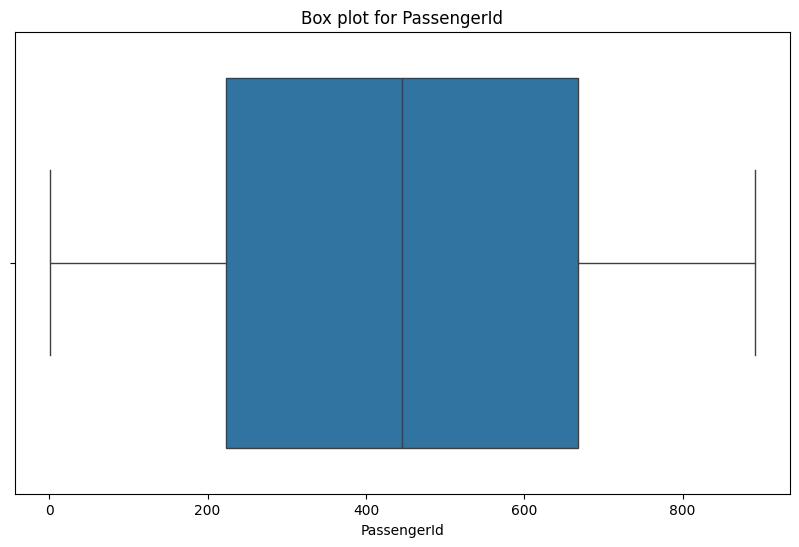

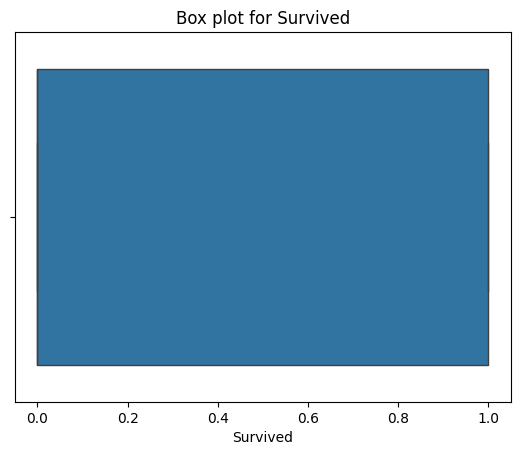

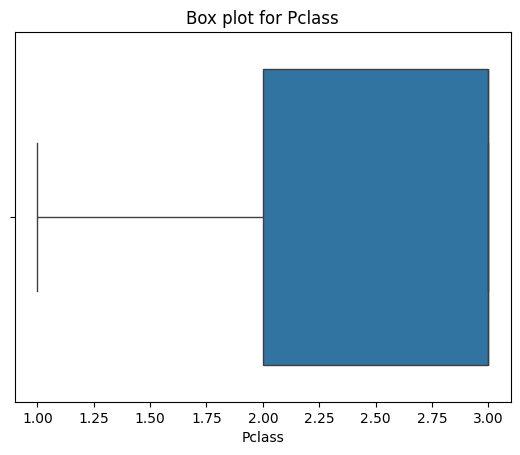

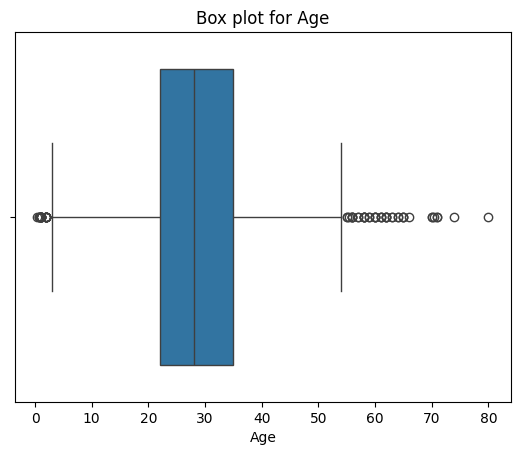

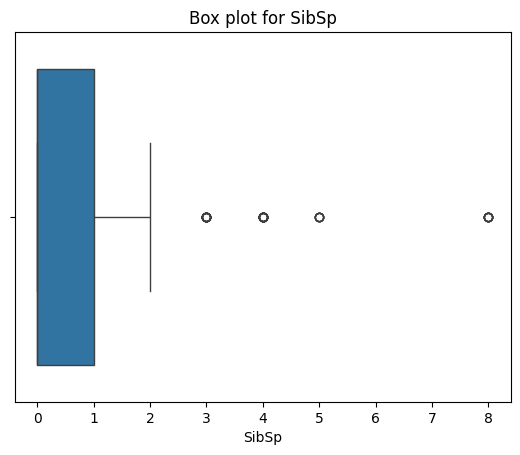

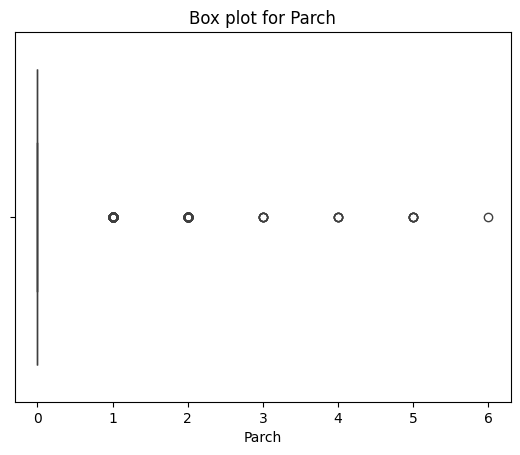

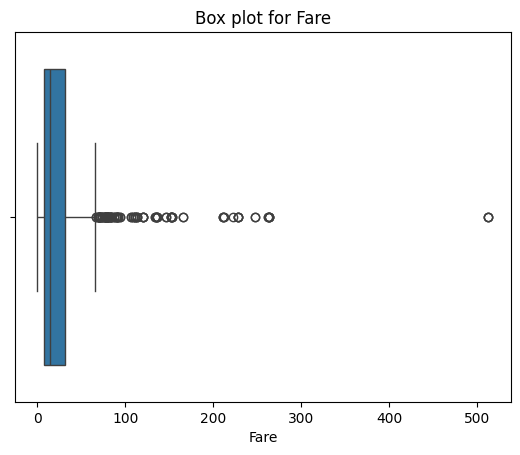

In [9]:
import matplotlib.pyplot as plt

# Plot box plots for numerical columns to visualize outliers
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 6))
for col in numerical_cols:
    sns.boxplot(x=train_df[col])
    plt.title(f'Box plot for {col}')
    plt.show()

In [11]:
# Function to count outliers using IQR method
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

# Count and print outliers for each numerical column
for col in numerical_cols:
    outlier_count = count_outliers_iqr(train_df, col)
    print(f'Number of outliers in {col}: {outlier_count}')



Number of outliers in PassengerId: 0
Number of outliers in Survived: 0
Number of outliers in Pclass: 0
Number of outliers in Age: 66
Number of outliers in SibSp: 46
Number of outliers in Parch: 213
Number of outliers in Fare: 116
